In [1]:
import sys
sys.path.append("../../")
import numpy as np 
import matplotlib.pyplot as plt
from TorchInversion.TorchInversion import TorchInversion
from TorchInversion.propagators import Acoustic_Simulation
from TorchInversion.utils import numpy2tensor,numpy2list
from TorchInversion.plots import plot_model,plot_wavelet,plot_dampRegion,plot_observeSystem,wiggle
from TorchInversion.demo import  *

In [2]:
save_path = "./data/multiShotTop"

# initialize the Project
Project = TorchInversion(save_path=save_path)


2023-12-31 16:00:44,434:logs:INFO:Save To: ./data/multiShotTop
2023-12-31 16:00:44,435:logs:INFO:device: cuda:0
2023-12-31 16:00:44,437:logs:INFO:pid: 2254133


In [3]:
# Model parameters
nx , ny = [90, 190]
nt , dt = [1001, 0.038]
pml, fs   = [20,  1]
nx_pml = nx+2*pml
ny_pml = ny+2*pml
dx, dy = [800, 800]

# velocity model 
x = np.arange(0,ny*dy/1000,dx/1000)
y = np.arange(0,nx*dx/1000,dy/1000)
step = 13 #km
layer_model = build_anomaly_backgroud_model(x, y, step)
anomaly_model = get_anomaly_model(layer_model, 15)
v = anomaly_model['vp'].T * 1000
rho = np.power(v, 0.25) * 310

#Domain frequency
f0 = 1

#PML coefficient
vmax = v.max()
vmin =  v.min()

#Source location
src_x = np.array([1 for i in range(10,ny-5,5)]) + pml 
src_y = np.array([i for i in range(10,ny-5,5)]) + pml

#Receiver location
rcv_x = np.array([1 for i in range(0,ny-1,2)])
rcv_y = np.array([j+1 for j in range(0,ny-1,2)])

In [4]:
model_config = Project.modelConfig(nx=nx,ny=ny,dx=dx,dy=dy,pml=pml,fs=fs,nt=nt,dt=dt,vmin=vmin,vmax=vmax)

source = Project.source(f0=f0,src_x=src_x,src_y=src_y,model_config=model_config)

receiver = Project.receiver(rcv_x=rcv_x,rcv_y=rcv_y)

vel_model = Project.vel_model(v=v,rho=rho,model_config=model_config)

configs = Project.saveConfig(model_config=model_config,source=source,receiver=receiver,vel_model=vel_model)

configs.keys()

2023-12-31 16:00:44,647:logs:INFO:
 ================ Model settings ================
nx	:	 90
ny	:	 190
dx	:	 800
dy	:	 800
nt	:	 1001
dt	:	 0.038
pml	:	 20
fs	:	 1
nx_pml	:	 130
ny_pml	:	 230
vmax	:	 7844.943820224718
vmin	:	 5799.999999999999
2023-12-31 16:00:44,649:logs:INFO:
 ================ Source settings ================
f0	:	 1
src_x	:	 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
src_y	:	 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180 185 190 195 200
2023-12-31 16:00:44,650:logs:INFO:
 =============== Receiver settings ===============
rcv_x	:	 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
rcv_y	:	 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 

dict_keys(['model_config', 'source', 'receiver', 'vel_model', 'optimizer'])

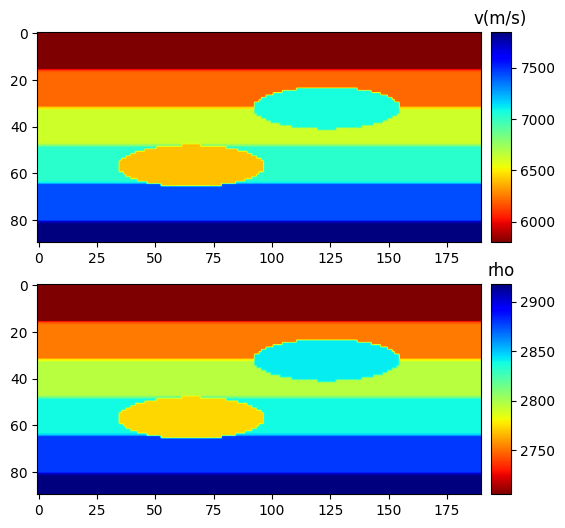

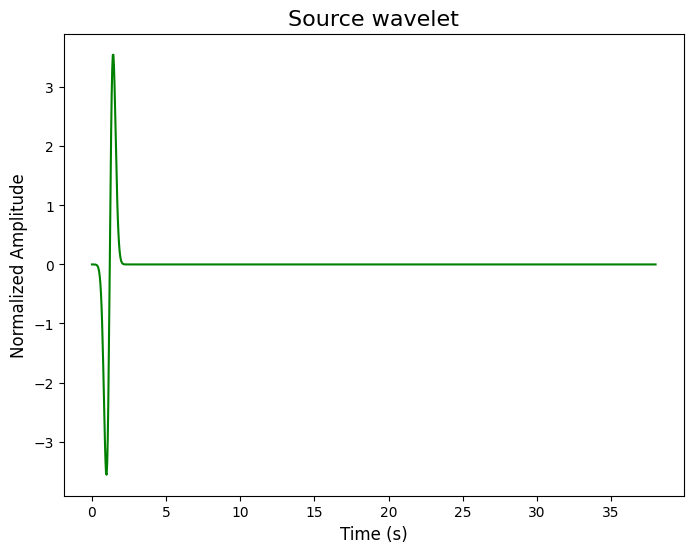

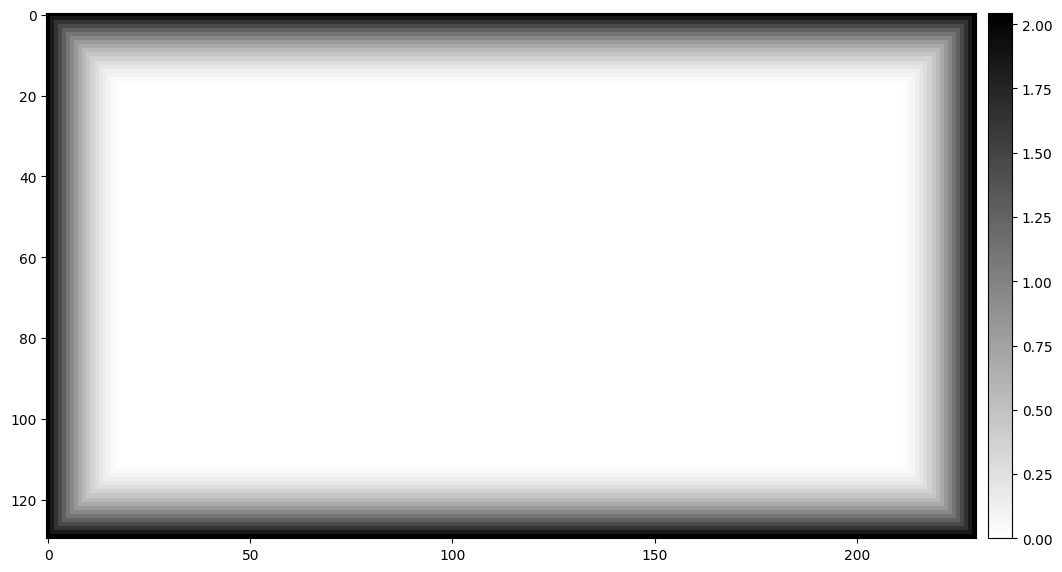

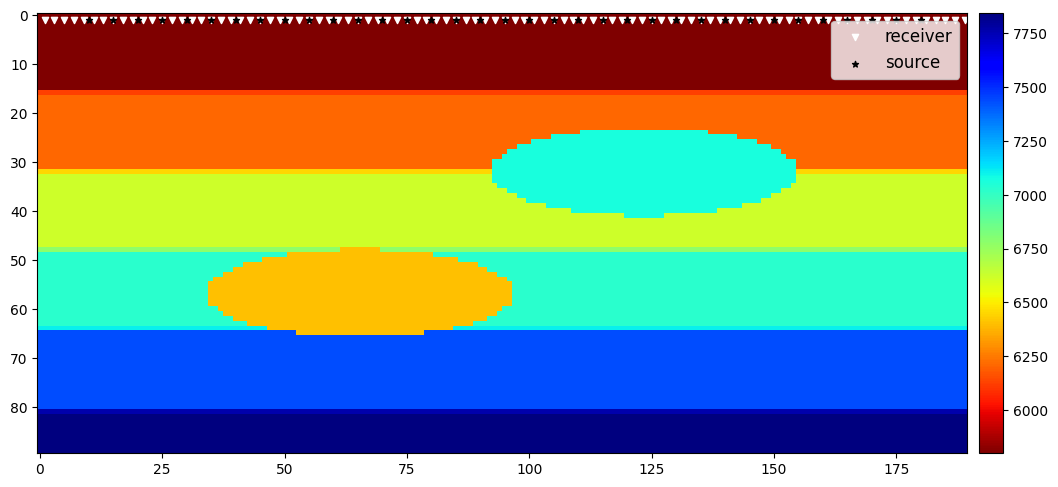

In [5]:
#Plot
plot_model(vel_model,save_path=os.path.join(save_path,"model/True/model.png"),show=True)
plot_wavelet(source,save_path=os.path.join(save_path,"model/True/ricker.png"),show=True)
plot_dampRegion(vel_model,save_path=os.path.join(save_path,"model/True/damp_global.png"),show=True)
plot_observeSystem(model_config,vel_model,source,receiver,save_path=os.path.join(save_path,"model/True/observed_system.png"),show=True)

In [6]:
csg = Project.forwrd(normalize=True)

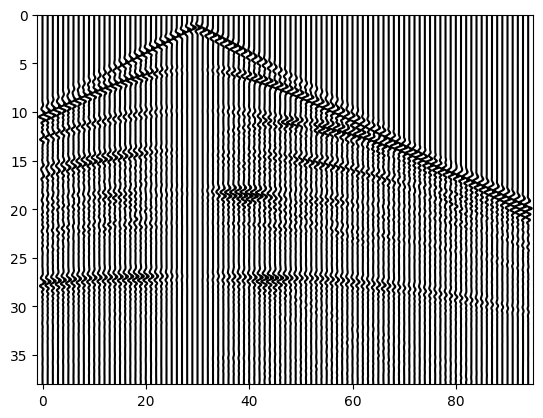

In [7]:
wiggle(csg[10],np.arange(nt)*dt,show=True)

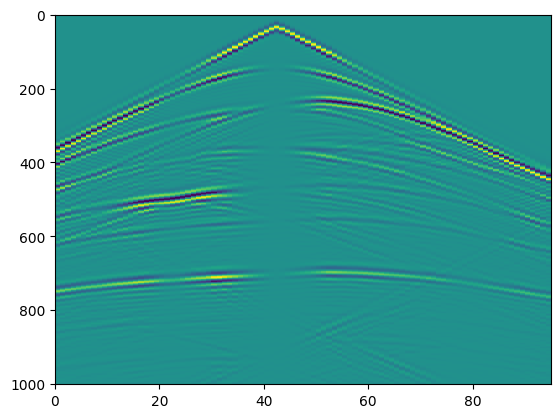

In [8]:
plt.figure()
plt.pcolormesh(csg[15])
plt.gca().invert_yaxis()
plt.show()